In [3]:
!pip install kaggle

In [4]:
from google.colab import files

# Upload do arquivo kaggle.json
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [6]:
!kaggle datasets download -d amirhosseinmirzaie/nba-players-stats2023-season

  0% 0.00/27.7k [00:00<?, ?B/s]
100% 27.7k/27.7k [00:00<00:00, 55.1MB/s]


In [7]:
!unzip nba-players-stats2023-season.zip


Archive:  nba-players-stats2023-season.zip
  inflating: 2023_nba_player_stats.csv  


In [8]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [9]:
#Ler os dados
# Carregar o conjunto de dados
data = pd.read_csv('/content/2023_nba_player_stats.csv')

In [27]:
# Visualizar as primeiras linhas do conjunto de dados
print(data.head())

                     PName POS Team  Age  GP   W   L     Min   PTS  FGM  ...  \
0             Jayson Tatum  SF  BOS   25  74  52  22  2732.2  2225  727  ...   
1              Joel Embiid   C  PHI   29  66  43  23  2284.1  2183  728  ...   
2              Luka Doncic  PG  DAL   24  66  33  33  2390.5  2138  719  ...   
3  Shai Gilgeous-Alexander  PG  OKC   24  68  33  35  2416.0  2135  704  ...   
4    Giannis Antetokounmpo  PF  MIL   28  63  47  16  2023.6  1959  707  ...   

   REB  AST  TOV  STL  BLK   PF    FP  DD2  TD3  +/-  
0  649  342  213   78   51  160  3691   31    1  470  
1  670  274  226   66  112  205  3706   39    1  424  
2  569  529  236   90   33  166  3747   36   10  128  
3  329  371  192  112   65  192  3425    3    0  149  
4  742  359  246   52   51  197  3451   46    6  341  

[5 rows x 30 columns]


In [18]:
# Selecione as colunas numéricas relevantes
string_colums = data[['PName']]
numeric_columns = data[['PTS', 'FG%', '3P%', 'FT%', 'REB', 'AST', 'TOV', 'STL', 'BLK']]

In [19]:
#Arrumar os dados (tratar colunas)

# Preencher valores ausentes com a média
numeric_columns = numeric_columns.fillna(numeric_columns.mean())

# Padronizar os dados
mean_values = numeric_columns.mean()
std_values = numeric_columns.std()
X_std = (numeric_columns - mean_values) / std_values
print(X_std)

          PTS       FG%       3P%       FT%       REB       AST       TOV  \
0    3.416235  0.025053  0.253035  0.629996  2.479078  1.747625  2.602978   
1    3.331912  0.772733  0.107168  0.644094  2.594577  1.222846  2.826042   
2    3.241566  0.298595  0.194688  0.103687  2.039082  3.190766  2.997630   
3    3.235543  0.426247  0.216568  0.869655  0.719095  1.971428  2.242644   
4    2.882189  0.818323 -0.293967 -0.352134  2.990573  1.878820  3.169218   
..        ...       ...       ...       ...       ...       ...       ...   
534 -1.050880 -4.223952 -2.299638 -3.383110 -1.084887 -0.891703 -1.017525   
535 -1.050880 -4.223952 -2.299638 -3.383110 -1.090387 -0.891703 -1.051843   
536 -1.050880 -4.223952 -2.299638 -3.383110 -1.079387 -0.883985 -1.051843   
537 -1.050880 -4.223952 -2.299638 -3.383110 -1.090387 -0.891703 -1.051843   
538 -1.050880 -4.223952 -2.299638 -3.383110 -1.046388 -0.876268 -1.051843   

          STL       BLK  
0    1.578485  1.121736  
1    1.155007  3.421086

In [20]:
#Calcular a Matriz de Covariância
covM = X_std.cov()
print(covM)

          PTS       FG%       3P%       FT%       REB       AST       TOV  \
PTS  1.000000  0.175478  0.181144  0.323084  0.739792  0.795328  0.918434   
FG%  0.175478  1.000000  0.043123  0.049772  0.370461  0.076796  0.165317   
3P%  0.181144  0.043123  1.000000  0.248766 -0.014666  0.166173  0.138745   
FT%  0.323084  0.049772  0.248766  1.000000  0.176128  0.279047  0.285038   
REB  0.739792  0.370461 -0.014666  0.176128  1.000000  0.544253  0.724334   
AST  0.795328  0.076796  0.166173  0.279047  0.544253  1.000000  0.882109   
TOV  0.918434  0.165317  0.138745  0.285038  0.724334  0.882109  1.000000   
STL  0.774378  0.127376  0.156980  0.300781  0.635967  0.771085  0.767500   
BLK  0.475282  0.373679 -0.071590  0.078003  0.731618  0.252331  0.435985   

          STL       BLK  
PTS  0.774378  0.475282  
FG%  0.127376  0.373679  
3P%  0.156980 -0.071590  
FT%  0.300781  0.078003  
REB  0.635967  0.731618  
AST  0.771085  0.252331  
TOV  0.767500  0.435985  
STL  1.000000  0.4322

In [28]:
#Calcular Autovalores e Autovetores de cov()

eigenValues, eigenVectors = np.linalg.eig(covM)


In [29]:
#Ordenar pelos Autovalores (decrescente)

sorted_indices = np.argsort(-eigenValues)
sorted_eigenValues = eigenValues[sorted_indices]
sorted_eigenVectors = eigenVectors[:, sorted_indices]

print("AutoValores: \n", sorted_eigenValues)
print("\nAutoVetores: \n", sorted_eigenVectors)

AutoValores: 
 [4.55521404 1.42292979 1.0399857  0.73880718 0.57414332 0.28556335
 0.19046491 0.13895284 0.05393887]

AutoVetores: 
 [[ 0.43762213  0.08630054 -0.08773062  0.05012288 -0.01287646  0.31301456
  -0.13486821 -0.6793757  -0.4614601 ]
 [ 0.13992458 -0.45725583  0.60697518  0.13028137 -0.61216134 -0.07653199
   0.02877528 -0.06720674  0.00164052]
 [ 0.08221645  0.47517864  0.59152955  0.53555401  0.35167618  0.03198263
  -0.01072222  0.07487356  0.01733121]
 [ 0.17384926  0.37846809  0.40816486 -0.80967524 -0.01835679  0.02974687
   0.02568919  0.04834622  0.01210969]
 [ 0.39545966 -0.30778173  0.01445079 -0.03706161  0.20933747  0.26368212
  -0.6086996   0.50636062 -0.08386272]
 [ 0.39591653  0.2396097  -0.22173932  0.13022075 -0.31134204 -0.01889868
   0.4728564   0.49414604 -0.39325184]
 [ 0.43820954  0.09680831 -0.16122337  0.08456497 -0.13707118  0.32914546
   0.14507094 -0.08355763  0.78121933]
 [ 0.40487442  0.11526847 -0.12446767  0.03336526 -0.00513166 -0.83671677
  

In [32]:
# Selecionar os dois maiores autovalores e autovetores
top_eigenValues = sorted_eigenValues[:2]  # Obter os dois maiores autovalores
top_eigenVectors = sorted_eigenVectors[:, :2]  # Obter os dois maiores autovetores

print("\nDois maiores autovalores:")
print(top_eigenValues)
print("\nDois maiores autovetores:")
print(top_eigenVectors)



Dois maiores autovalores:
[4.55521404 1.42292979]

Dois maiores autovetores:
[[ 0.43762213  0.08630054]
 [ 0.13992458 -0.45725583]
 [ 0.08221645  0.47517864]
 [ 0.17384926  0.37846809]
 [ 0.39545966 -0.30778173]
 [ 0.39591653  0.2396097 ]
 [ 0.43820954  0.09680831]
 [ 0.40487442  0.11526847]
 [ 0.28781197 -0.48952571]]


In [45]:
print(X_std.head())
print(string_colums.head())

        PTS       FG%       3P%       FT%       REB       AST       TOV  \
0  3.416235  0.025053  0.253035  0.629996  2.479078  1.747625  2.602978   
1  3.331912  0.772733  0.107168  0.644094  2.594577  1.222846  2.826042   
2  3.241566  0.298595  0.194688  0.103687  2.039082  3.190766  2.997630   
3  3.235543  0.426247  0.216568  0.869655  0.719095  1.971428  2.242644   
4  2.882189  0.818323 -0.293967 -0.352134  2.990573  1.878820  3.169218   

        STL       BLK  
0  1.578485  1.121736  
1  1.155007  3.421086  
2  2.001963  0.443240  
3  2.778341  1.649456  
4  0.660948  1.121736  
                     PName
0             Jayson Tatum
1              Joel Embiid
2              Luka Doncic
3  Shai Gilgeous-Alexander
4    Giannis Antetokounmpo


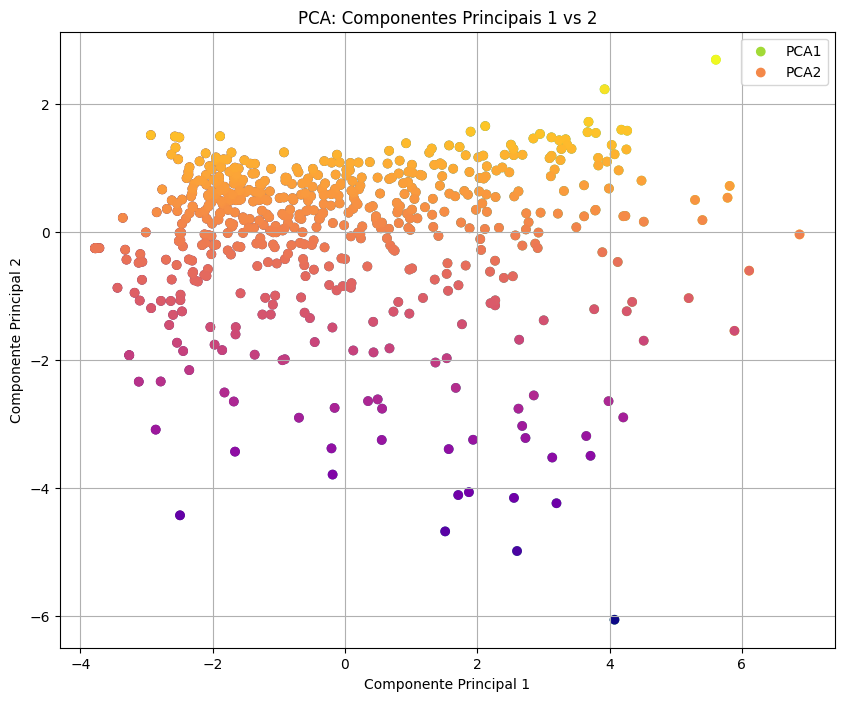

In [67]:
# Adicionar os componentes principais ao DataFrame original
result = pd.concat([data['PName'], principal_components], axis=1)
result.columns = ['PName', 'PCA1', 'PCA2']  # Adicionar nomes de colunas

# Plotar o gráfico de dispersão com cores para PC1 e PC2
plt.figure(figsize=(10, 8))
plt.scatter(result['PCA1'], result['PCA2'], c=result['PCA1'], cmap='viridis', label='PCA1')
plt.scatter(result['PCA1'], result['PCA2'], c=result['PCA2'], cmap='plasma', label='PCA2')

plt.title('PCA: Componentes Principais 1 vs 2')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(True)
plt.show()

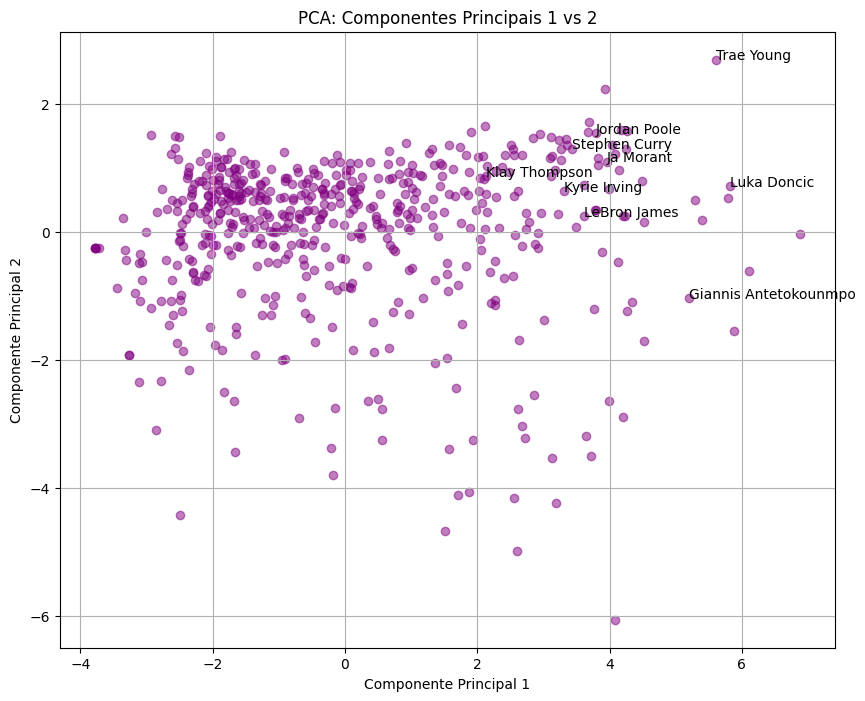

In [77]:
# Adicionar os componentes principais ao DataFrame original
result = pd.concat([data['PName'], principal_components], axis=1)
result.columns = ['PName', 'PC1', 'PC2']  # Adicionar nomes de colunas

# Escolher manualmente os jogadores para exibir
jogadores_escolhidos = ['Luka Doncic', 'Giannis Antetokounmpo', 'Trae Young', 'Stephen Curry', 'LeBron James', 'Kyrie Irving', 'Jordan Poole', 'Ja Morant', 'Klay Thompson']  # Substitua pelos nomes que deseja exibir

# Plotar o gráfico de dispersão
plt.figure(figsize=(10, 8))

# Exibir todos os pontos
plt.scatter(result['PC1'], result['PC2'], alpha=0.5, c='purple')

# Exibir nomes apenas para jogadores escolhidos manualmente
for jogador in jogadores_escolhidos:
    jogador_data = result[result['PName'] == jogador]
    plt.text(jogador_data['PC1'].values[0], jogador_data['PC2'].values[0], jogador)

plt.title('PCA: Componentes Principais 1 vs 2')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()